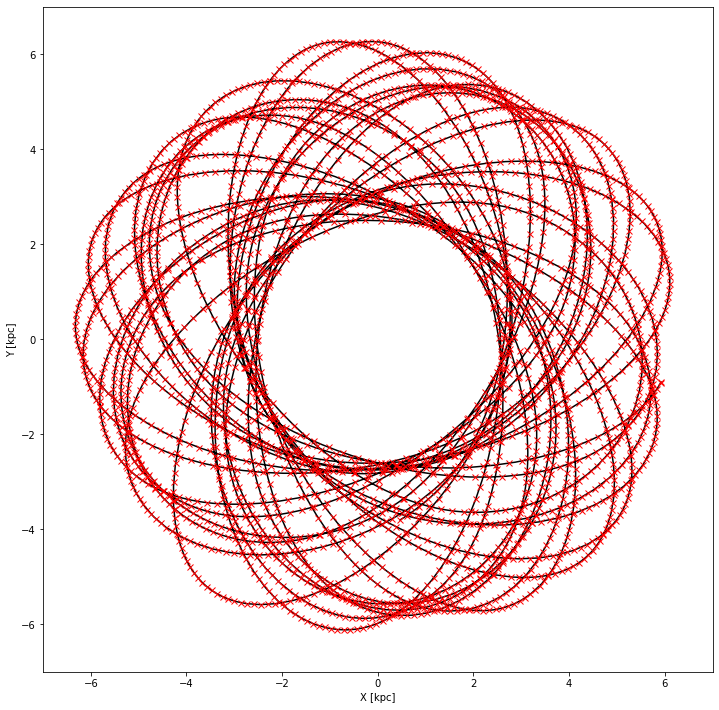

In [14]:
from IPython.display import display, Math, HTML, Image
import orbits
import gaia
import numpy as np
from astropy.visualization import quantity_support
quantity_support()  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib.collections import LineCollection
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

nbody = np.loadtxt('2024-04-07/ngc6397.nbform')
orbit = np.loadtxt('NGC6397.orb_bv15')
nborb = np.loadtxt('2024-04-07/orbit')

fig, ax = plt.subplots(ncols=1)

ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])

#ax.scatter(nbody[:,1] / 1000, nbody[:,2] / 1000, color='g', marker='.', s=0.1)

def plot(p, cmap, width):
    # Create a continuous norm to map from data points to colors
    points = p[:,1:3].reshape(-1, 1, 2) / 1000
    
    
    segments = np.concatenate([points[:-1], points[1:]], axis=1)[len(orbit)//2:]
    t = np.linspace(0, 1, len(segments))
    norm = plt.Normalize(t.min(), t.max())
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    # Set the values used for colormapping
    lc.set_array(t)
    lc.set_linewidth(width)
    line = ax.add_collection(lc)
    return line


ax.plot(orbit[:,1]/ 1000, orbit[:,2]/ 1000, '-k')
ax.plot(nborb[:,1]/ 1000, nborb[:,2]/ 1000, 'xr')
#plot(orbit, 'viridis', 1)
#plot(nborb, 'inferno', 1)

#fig.colorbar(line, ax=axs[0])

#ax.plot(orbit[:,1], orbit[:,2], c=t, cmap='inferno')

#ax.set_xlim(points[:,1].min(), points[:,1].max())
#ax.set_ylim(points[:,2].min(), points[:,2].max())

